# 第三章 ニューラルネットワーク

# Introduction

# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from ipywidgets import interact

## 3.1 パーセプトロンからニューラルネットワークへ

パーセプトロンの実装を次のように関数$h$とそれ以外の部分に分けて考えます。

$$
y = h(w_1x_1+w_2x_2+b)
$$

$$
h(x) =   \begin{cases}
    0 \ \ \ (x<0)\\
    1 \ \ \  (x>0)
  \end{cases}
$$

関数$h(x)$をプロットすると、次のような階段のような形状をしています。

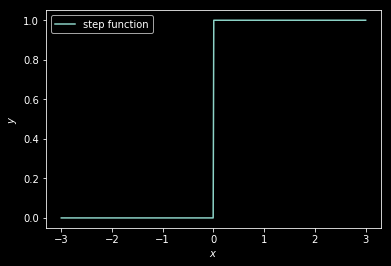

In [2]:
def step_func(x):
    return 0 if x<0 else 1

xm = -3
xs = np.linspace(-xm, xm, 500)
plt.plot(xs, [step_func(x) for x in xs], label="step function")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

# 3.2 活性化関数

関数$h$として、異なる形状の関数を用いることもできます。例えば、恒等関数やシグモイド関数、ReLU関数などが使われています。
$$
\begin{align}
h(x) &= x \ \ \ &\mathrm{(identity)} \\
h(x) &= \frac{1}{1 + \exp(-x)} \ \ \ &\mathrm{(sigmoid)} \\
h(x) &=   \begin{cases}
    0 \ \ \ (x<0)\\
    x \ \ \  (x>0)
  \end{cases} \ \ \ &\mathrm{(ReLu)} \\ 
\end{align}
$$

Text(0, 0.5, '$y$')

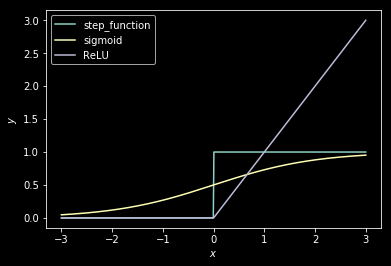

In [3]:
def step_func(x):
    return 0 if x<0 else 1

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def relu(x):
    return np.max([0, x])

xm = -3
xs = np.linspace(-xm, xm, 500)
plt.plot(xs, [step_func(x) for x in xs], label="step_function")
plt.plot(xs, [sigmoid(x) for x in xs], label="sigmoid")
plt.plot(xs, [relu(x) for x in xs], label="ReLU")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

## 3.3 多次元配列の計算

二層のニューラルネットワークの計算を活性関数を抜きに愚直に表現すると次のようになります。(テキスト図3-14)
$$
y_1 = w_{11}x_1 + w_{12}x_2 + b_1 \\
y_2 = w_{21}x_1 + w_{22}x_2 + b_2 \\
y_3 = w_{31}x_1 + w_{32}x_2 + b_3
$$

ニューラルネットワークの計算は頻出する一方で、表記は煩雑です。そこで、行列とベクトルを用いて次のように簡略化します。
$$
{\bf y} = {\bf Wx} + {\bf b} \\
$$

ここで、次のような表記を導入しています。
$$
{\bf x} = (x_1, x_2) \\
{\bf y} = (y_1, y_2, y_3) \\
{\bf b} = (b_1, b_2, b_3) \\
{\bf W} = \left(
    \begin{array}{cc}
      w_{11} & w_{12} \\
      w_{21} & w_{22} 
    \end{array}
  \right)
$$

活性関数を合わせて考えると、ニューラルネットワークの計算は上記の行列計算(線形)と活性関数（非線形）の計算を交互に繰り返して最終的な出力を計算します。

## 3.4 3層ニューラルネットワークの実装
NumPyの多次元配列を使ってニューラルネットワークのフォワード処理を実装

 → ニューラルネットワークの計算は行列の計算としてまとめて行える

### 3.4.1 記号の確認

$ a^{(1)}_2 $ は 1層目の2番目のニューロンを意味する。

$ w^{(1)}_{2 3} $ は 1層目のニューロンへの重みであり、前層(入力層)の3番目のニューロンから次層(第1層)の2番目のニューロンへの重みであることを意味する。

### 3.4.2 各層における信号伝達の実装

入力が2要素($ x_1, x_2 $)、第1層目が3つのニューロン($ a^{(1)}_1, a^{(1)}_2, a^{(1)}_3 $)であるニューラルネットワークの第1層目について見ていく。

$$
a^{(1)}_1 = w^{(1)}_{1 1} x_1 + w^{(1)}_{1 2} x_2 + b^{(1)}_1
$$
$$
a^{(1)}_2 = w^{(1)}_{2 1} x_1 + w^{(1)}_{2 2} x_2 + b^{(1)}_2
$$
$$
a^{(1)}_3 = w^{(1)}_{3 1} x_1 + w^{(1)}_{3 2} x_2 + b^{(1)}_3
$$

これは行列の積でまとめて表すことができる。

$$
{\bf A}^{(1)} = {\bf X}{\bf W}^{(1)} + {\bf B}^{(1)} \\
$$

$$
{\bf X} = \left(
    \begin{array}{ccc}
      1.0 & 0.5
    \end{array}
  \right),
{\bf W^{(1)}} = \left(
    \begin{array}{ccc}
      0.1 & 0.3 & 0.5 \\
      0.2 & 0.4 & 0.6 \\
    \end{array}
  \right),
{\bf B^{(1)}} = \left(
    \begin{array}{ccc}
      0.1 & 0.2 & 0.3
    \end{array}
  \right)
$$
ならば
$$
\begin{eqnarray}
{\bf A^{(1)}} &=& \left(
    \begin{array}{ccc}
      1.0 & 0.5
    \end{array}
  \right)
\left(
    \begin{array}{ccc}
      0.1 & 0.3 & 0.5 \\
      0.2 & 0.4 & 0.6 \\
    \end{array}
  \right) +
\left(
    \begin{array}{ccc}
      0.1 & 0.2 & 0.3
    \end{array}
  \right) \\
  &=& \left(
    \begin{array}{ccc}
      0.3 & 0.7 & 1.1
    \end{array}
  \right)
\end{eqnarray}  
$$

となるがNumPyを用いて下記のように実装できる

In [4]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [5]:
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


続いて活性化関数について見ていく。
隠れ層での重み付き和(重み付き信号とバイアスの総和)を$ a $,活性化関数を $ h() $, 活性化関数で変換された信号を $ z $ で表すと
$$
z^{(1)}_1 = h(a^{(1)}_1) \\
z^{(1)}_2 = h(a^{(1)}_2) \\
z^{(1)}_3 = h(a^{(1)}_3) 
$$
つまり
$$
{\bf Z^{(1)} = h({\bf A^{(1)} })}
$$
となり、活性化関数にシグモイド関数を使うことにしてPythonで実装すると

In [6]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


となる。

続いて第1層から2層目(2要素)までの実装に移る。
$$
{\bf Z^{(2)} = h({\bf Z^{(1)}}{\bf W}^{(2)} + {\bf B}^{(2)})}
$$


In [7]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

この実装は第1層の出力が第2層への入力になっている点を除けば先ほどの実装とまったく同じである。

最後に第2層から出力層への信号の伝達の実装を行う。
出力層の実装もこれまでの実装とほとんど同じだが、活性化関数だけが隠れ層とは異なる。

$$
{\bf Y} = {σ ({\bf Z^{(2)}}{\bf W}^{(3)} + {\bf B}^{(3)})}
$$

In [8]:
def identity_function(x):
  return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくは Y = A3

出力層の活性化関数は解く問題の性質に応じて決める。
たとえば、回帰問題では恒等関数、2 クラス分類問題ではシグモイド関数、多クラス分類ではソフトマックス関数を使うのが一般的である。
出力層の活性化関数は次節にて詳しく説明。

### 3.4.3 実装のまとめ

入力層（第0層）が2つ、ひとつ目の隠れ層（第1層）が3つ、2つ目の隠れ層（第2層）が2つ、出力層（第3層)が2つのニューロンから構成されるニューラルネットワークのフォワード方向の実装をまとめると以下のようになる。

In [9]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]
